In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('insurance_cleaned.csv')
df.head()

,Unnamed: 0,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,0,19,27.900,0,16884.92,1,0,0,1,0,0,0,1
1,1,18,33.770,1,1725.55,0,1,1,0,0,0,1,0
2,2,28,33.000,3,4449.46,0,1,1,0,0,0,1,0
3,3,33,22.705,0,21984.47,0,1,1,0,0,1,0,0
4,4,32,28.880,0,3866.86,0,1,1,0,0,1,0,0


In [3]:
# ***Need to remove "Unnamed" from dataframe***

# df = df.drop(columns='Unnamed: 0')
# df.head()

In [4]:
# Check the types of each column's values in the dataframe
df.dtypes

Unnamed: 0            int64
age                   int64
bmi                 float64
children              int64
charges             float64
sex_female            int64
sex_male              int64
smoker_no             int64
smoker_yes            int64
region_northeast      int64
region_northwest      int64
region_southeast      int64
region_southwest      int64
dtype: object

In [5]:
# Convert all column values to the float type to make the values compatible with StandardScalar()
df['Unnamed: 0'] = df.age.astype(float)
df['age'] = df.age.astype(float)
df['children'] = df.children.astype(float)
df['sex_female'] = df.bmi.astype(float)
df['sex_male'] = df.age.astype(float)
df['smoker_no'] = df.age.astype(float)
df['smoker_yes'] = df.age.astype(float)
df['region_northeast'] = df.age.astype(float)
df['region_northwest'] = df.age.astype(float)
df['region_southeast'] = df.age.astype(float)
df['region_southwest'] = df.age.astype(float)

df.dtypes

Unnamed: 0          float64
age                 float64
bmi                 float64
children            float64
charges             float64
sex_female          float64
sex_male            float64
smoker_no           float64
smoker_yes          float64
region_northeast    float64
region_northwest    float64
region_southeast    float64
region_southwest    float64
dtype: object

In [6]:
# Assign X to the independent variables we will use and assign y to the dependent variable that we will be trying to predict

X = df[['age', 'bmi', 'children', 'sex_female', 'smoker_no', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1338, 9) (1338, 1)


In [7]:
# Split the data into training data and testing data
from sklearn.model_selection import train_test_split

# Set the random_state to 42 to validate processing over multiple runs of the code
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# Create a StandardScaler model and fit it to the training data
from sklearn.preprocessing import StandardScaler

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

In [9]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

In [10]:
# Create a LinearRegression model and fit it to the scaled training data
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

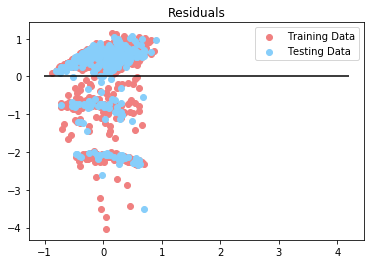

In [11]:
# Make predictions using the X_test_scaled data
# Plot X_test_scaled vs y_test_scaled
# Create a scatter plot to visualize the relationships of y_test_scaled vs predictions

predictions = model.predict(X_test_scaled)
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="lightcoral", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="lightskyblue", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residuals")
plt.show()

In [12]:
# Use X_test_scaled, y_test_scaled, and model.predict(X_test_scaled) to calculate MSE and R2

from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9075562333874532, R2: 0.12733317433736002


In [13]:
# LASSO model

from sklearn.linear_model import Lasso

lasso = Lasso(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = lasso.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = lasso.score(X_test_scaled, y_test_scaled)
### END SOLUTION

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9075760903418219, R2: 0.12731408074877704


In [14]:
# Ridge model

from sklearn.linear_model import Ridge

ridge = Ridge(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = ridge.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = ridge.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9075562019475326, R2: 0.12733320456862796


In [15]:
# ElasticNet model

from sklearn.linear_model import ElasticNet

elasticnet = ElasticNet(alpha=.01).fit(X_train_scaled, y_train_scaled)

predictions = elasticnet.predict(X_test_scaled)

MSE = mean_squared_error(y_test_scaled, predictions)
r2 = elasticnet.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 0.9074921847239236, R2: 0.12739476076234846
